# Анализ рынка

**Описание исследования**   
Исследование рынка заведений общественного питания Москвы.

**Цель исследования**   
Подготовить информацию, подтверждающую для инвесторов перспективность открытия оригинального кафе в Москве.

**Задачи исследования** 
- Исследовать соотношения разных типов заведений Москвы по нескольким признакам (количество посадочных мест, принадлежность к сети);   
- Изучить среднее количество посадочных мест в разных типах заведений Москвы;   
- Выделить в отдельный столбец информацию об улице и постройть график топ-10 улиц по количеству объектов общественного питания;  
- Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения;   
- Подготовить презентацию с результатами исследования.

**СОДЕРЖАНИЕ**      

[1. Подготовка данных к анализу.](#section_1)   
[2. Анализ данных](#section_2)   
[3. Cоотношение видов объектов общественного питания по количеству. График](#section_3)   
[4. Соотношение сетевых и несетевых заведений по количеству. График](#section_4)    
[5. Для какого вида объекта общественного питания характерно сетевое распространение?](#section_5)   
[6. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#section_6)   
[7. Среднее количество посадочных мест для каждого вида объекта](#section_7)   
[8. Анализ местарасположения](#section_8)   
[9. Выводы](#section_10)

## **Подготовка данных к анализу.**
<a id='section_1'></a>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests

In [2]:
data = pd.read_csv('_.csv')
pd.set_option('display.max_columns', None)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


В данных нет пропусков.

In [3]:
data['object_name'] = data['object_name'].str.lower()
data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


После удаления дубликатов осталось 15366 строк, значит дубликатов не было.

## **Анадиз данных**
<a id='section_2'></a>

###  **Cоотношение видов объектов общественного питания по количеству. График**
<a id='section_3'></a>

In [5]:
data_type = data.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index()
data_type.columns = ['object_type', 'quantity']
data_type['share'] = round(data_type['quantity'] / data_type['quantity'].sum(), 3)
data_type

,object_type,quantity,share
0,кафе,6099,0.397
1,столовая,2587,0.168
2,ресторан,2285,0.149
3,предприятие быстрого обслуживания,1923,0.125
4,бар,856,0.056
5,буфет,585,0.038
6,кафетерий,398,0.026
7,закусочная,360,0.023
8,магазин (отдел кулинарии),273,0.018


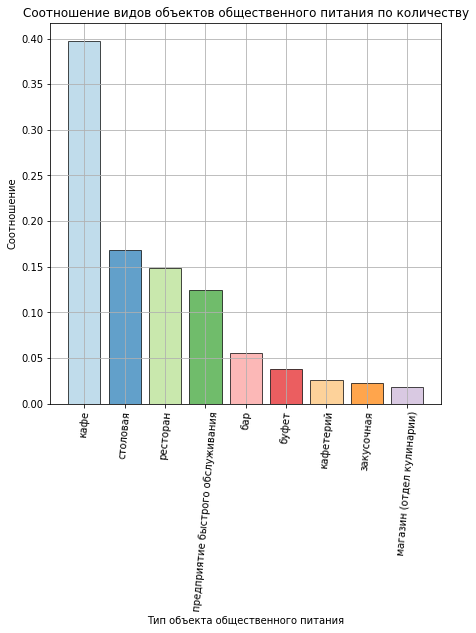

In [6]:
plt.figure(figsize=(7, 7))
col_map = plt.get_cmap('Paired')

plt.bar(
    x='object_type', 
    height='share', 
    data=data_type, 
    alpha=0.7,
    color=col_map.colors, 
    edgecolor='k'
)

plt.title('Cоотношение видов объектов общественного питания по количеству')
plt.xlabel('Тип объекта общественного питания')
plt.ylabel('Соотношение')
plt.xticks(rotation=85) 
plt.grid()

plt.savefig('1.png')
plt.show()

В Москве на момент исследования бОльшая часть заведений относится к типу "кафе" - 39.7 % от всех заведений.

###  **Соотношение сетевых и несетевых заведений по количеству. График**
<a id='section_4'></a>

In [7]:
data_chain = data.pivot_table(index='chain', values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index()
data_chain.columns = ['chain', 'quantity']
data_chain['share'] = round(data_chain['quantity'] / data_chain['quantity'].sum(), 3)
data_chain

,chain,quantity,share
0,нет,12398,0.807
1,да,2968,0.193


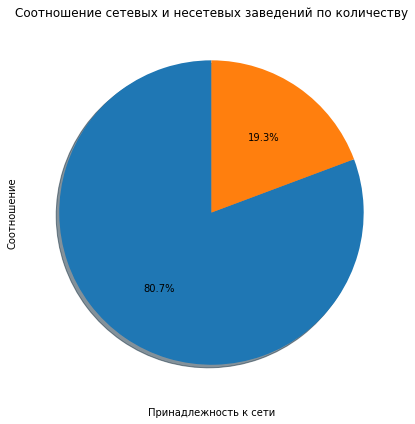

In [8]:
plt.figure(figsize=(7, 7))

plt.pie(
    x='share',  
    data=data_chain, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90
)

plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.xlabel('Принадлежность к сети')
plt.ylabel('Соотношение')
plt.xticks(rotation=85) 
plt.grid()

plt.savefig('2.png')
plt.show()

19 % ресторанов Москвы на момент сбора информации сетевые.

###  **Для какого вида объекта общественного питания характерно сетевое распространение?**
<a id='section_5'></a>

In [9]:
data_grouped_with_chain = data.groupby(['object_type', 'chain'], as_index=False).agg({'id': 'sum'})
data_grouped_with_chain

,object_type,chain,id
0,бар,да,4806907
1,бар,нет,116355855
2,буфет,да,1874466
3,буфет,нет,37793575
4,закусочная,да,8257583
5,закусочная,нет,53245363
6,кафе,да,160789883
7,кафе,нет,645393824
8,кафетерий,да,9054576
9,кафетерий,нет,59510241


In [10]:
data_grouped_without_chain = data.groupby('object_type', as_index=False).agg({'id': 'sum'})
data_grouped_without_chain

,object_type,id
0,бар,121162762
1,буфет,39668041
2,закусочная,61502946
3,кафе,806183707
4,кафетерий,68564817
5,магазин (отдел кулинарии),47005959
6,предприятие быстрого обслуживания,298278852
7,ресторан,247532385
8,столовая,149719079


In [11]:
data_grouped = data_grouped_with_chain.merge(data_grouped_without_chain, left_on='object_type', right_on='object_type')
data_grouped

,object_type,chain,id_x,id_y
0,бар,да,4806907,121162762
1,бар,нет,116355855,121162762
2,буфет,да,1874466,39668041
3,буфет,нет,37793575,39668041
4,закусочная,да,8257583,61502946
5,закусочная,нет,53245363,61502946
6,кафе,да,160789883,806183707
7,кафе,нет,645393824,806183707
8,кафетерий,да,9054576,68564817
9,кафетерий,нет,59510241,68564817


In [12]:
data_grouped['share'] = round(data_grouped['id_x']/data_grouped['id_y'], 2)
data_grouped

,object_type,chain,id_x,id_y,share
0,бар,да,4806907,121162762,0.04
1,бар,нет,116355855,121162762,0.96
2,буфет,да,1874466,39668041,0.05
3,буфет,нет,37793575,39668041,0.95
4,закусочная,да,8257583,61502946,0.13
5,закусочная,нет,53245363,61502946,0.87
6,кафе,да,160789883,806183707,0.20
7,кафе,нет,645393824,806183707,0.80
8,кафетерий,да,9054576,68564817,0.13
9,кафетерий,нет,59510241,68564817,0.87


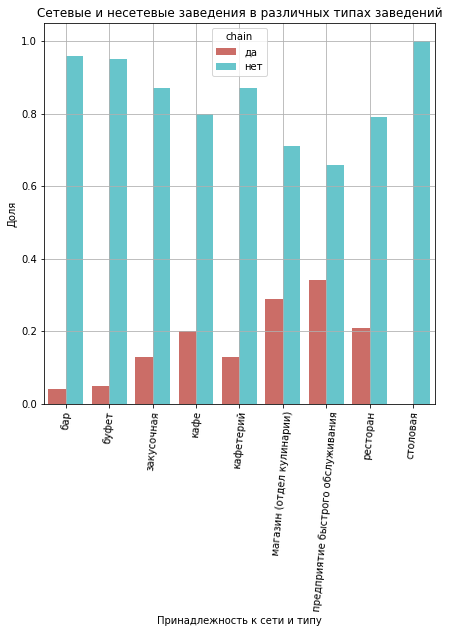

In [13]:
plt.figure(figsize=(7, 7))

sns.barplot(x='object_type', y='share', hue='chain', data=data_grouped, palette = 'hls', saturation=0.75)

plt.title('Сетевые и несетевые заведения в различных типах заведений')
plt.xlabel('Принадлежность к сети и типу')
plt.ylabel('Доля')
plt.xticks(rotation=85) 
plt.grid()

plt.savefig('3.png')
plt.show()

Самая большая доля сетевых заведений среди предприятий быстрого обслуживания(34%) и магазинов(отделов кулинарий)(29%).


###  **Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?**
<a id='section_6'></a>

In [14]:
data_chain = data.query('chain == "да"')
data_chain

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [15]:
data_chain_grouped = data_chain.pivot_table(
    index = 'object_name',
    values = 'number',
    aggfunc = ['count', 'mean']
).reset_index()
data_chain_grouped.columns = ["_".join((j,k)) for j,k in data_chain_grouped.columns]
data_chain_grouped.sort_values('count_number', ascending=False).head(25)

,object_name_,count_number,mean_number
563,шоколадница,157,57.184713
25,kfc,155,55.341935
330,макдоналдс,151,87.119205
109,бургер кинг,137,46.649635
521,теремок,94,25.606383
311,крошка картошка,90,21.855556
159,домино'с пицца,90,18.344444
339,милти,72,1.333333
505,суши wok,72,6.708333
367,папа джонс,51,22.039216


In [16]:
data_chain_grouped['count_number'].median()

1.0

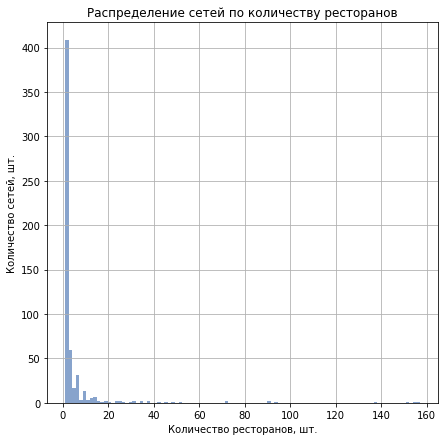

In [17]:
plt.figure(figsize=(7, 7))

data_chain_grouped['count_number'].hist(bins=100, grid=True, color='#87a3cc')
plt.title('Распределение сетей по количеству ресторанов')
plt.xlabel('Количество ресторанов, шт.')
plt.ylabel('Количество сетей, шт.') 

plt.show()

Медианное значение столбца количества заведений сети - 1. Это значение не подходит для определения категории. Возьмём условную границу в 10 заведений. Свыше неё - заведений много.

In [18]:
data_chain_grouped['mean_number'].median()

43.5

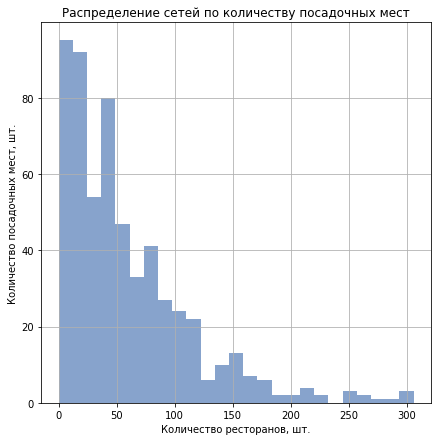

In [19]:
plt.figure(figsize=(7, 7))

data_chain_grouped['mean_number'].hist(bins=25, grid=True, color='#87a3cc')
plt.title('Распределение сетей по количеству посадочных мест')
plt.xlabel('Количество ресторанов, шт.')
plt.ylabel('Количество посадочных мест, шт.') 

plt.show()

Медианное значение количества посадочных мест - 45. Возьмём её для определения группы.

In [20]:
median_count = 10
median_number = 45

In [21]:
def chain_category(row):
    count = row['count_number']
    number = row['mean_number']
    
    if count > median_count:
        if number > median_number:
            return 'много заведений - много мест'
        else:
            return 'много заведений - мало мест'
    
    else:
        if number > median_number:
            return 'мало заведений - много мест'
        else:
            return 'мало заведений - мало мест'

In [22]:
data_chain_grouped['category'] = data_chain_grouped.apply(chain_category, axis=1)
data_chain_grouped.head()

,object_name_,count_number,mean_number,category
0,beverly hills diner,1,88.000000,мало заведений - много мест
1,bierloga,1,75.000000,мало заведений - много мест
2,black & white,1,40.000000,мало заведений - мало мест
3,bocconcino,3,66.666667,мало заведений - много мест
4,boobo,1,46.000000,мало заведений - много мест


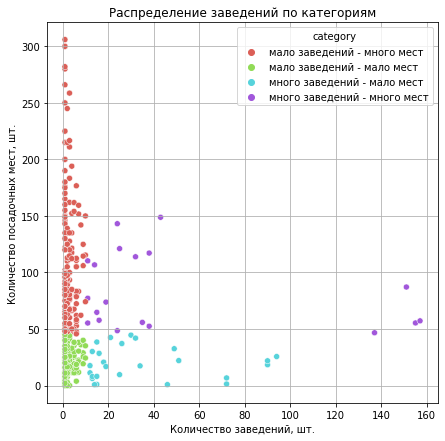

count                     mean            
                             count_number mean_number count_number mean_number
category                                                                      
мало заведений - мало мест            275         275     1.996364   21.479385
мало заведений - много мест           257         257     2.163424  101.575695
много заведений - мало мест            26          26    34.884615   19.592626
много заведений - много мест           19          19    50.315789   83.835064

In [23]:
plt.figure(figsize=(7, 7))

sns.scatterplot(data=data_chain_grouped, x='count_number', y='mean_number', hue='category', palette = 'hls')

plt.title('Распределение заведений по категориям')
plt.xlabel('Количество заведений, шт.')
plt.ylabel('Количество посадочных мест, шт.')
plt.grid()

plt.savefig('4.png')
plt.show()

data_chain_grouped.pivot_table(
    index='category',
    values=['count_number', 'mean_number'],
    aggfunc=['count', 'mean']
)

Из графика можно сделать вывод, что для сетевых ресторанов характерно небольшое количество заведений (меньше 10), а вот больше 45 посадочных или меньше - уже на усмотрение руководителей. 

 ###  **Среднее количество посадочных мест для каждого вида объекта**
<a id='section_7'></a>

In [24]:
data_object_number = data.pivot_table(
    index = ['object_type', 'chain'],
    values = 'number'
).reset_index().sort_values(by='number', ascending=False)
data_object_number = round(data_object_number)
data_object_number

,object_type,chain,number
17,столовая,нет,130.0
16,столовая,да,112.0
14,ресторан,да,100.0
15,ресторан,нет,96.0
0,бар,да,53.0
3,буфет,нет,52.0
6,кафе,да,47.0
1,бар,нет,43.0
12,предприятие быстрого обслуживания,да,40.0
7,кафе,нет,37.0


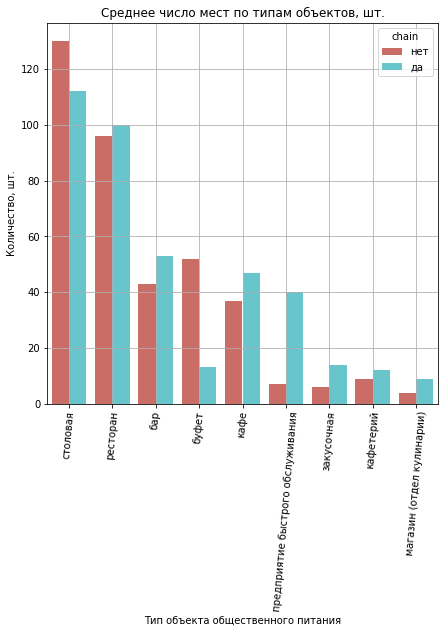

In [25]:
plt.figure(figsize=(7, 7))

sns.barplot(data=data_object_number, x='object_type', y='number', hue='chain', palette = 'hls', saturation=0.75)

plt.title('Среднее число мест по типам объектов, шт.')
plt.xlabel('Тип объекта общественного питания')
plt.ylabel('Количество, шт.')
plt.xticks(rotation=85) 
plt.grid()

plt.savefig('5.png')
plt.show()

Больше всего посадочных мест в несетевых столовых и сетевых ресторанах. Меньше всего - в несетевых магазинах (отделах кулинарии).

 ###  **Анализ месторасположения заведения**
<a id='section_8'></a>

In [26]:
data['street']= data['address'].str.extract(r'(?:,\s+)(.+?)(?:,)')
data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [27]:
data.groupby('street', as_index=False)['id'].count().sort_values(by='id', ascending=False).head(10)

,street,id
1331,город Зеленоград,232
1440,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1407,поселение Сосенское,138
1437,проспект Вернадского,132
674,Кутузовский проспект,114


Зеленоград - это часть Москвы, но всё-таки не улица. Уберём его из анализа.

In [28]:
data_streets = data.groupby('street', as_index=False)['id'].count().sort_values(by='id', ascending=False).drop(index=[1331, 1407]).head(10)
data_streets

,street,id
1440,проспект Мира,204
993,Профсоюзная улица,182
683,Ленинградский проспект,171
979,Пресненская набережная,167
407,Варшавское шоссе,161
686,Ленинский проспект,147
1437,проспект Вернадского,132
674,Кутузовский проспект,114
600,Каширское шоссе,112
605,Кировоградская улица,110


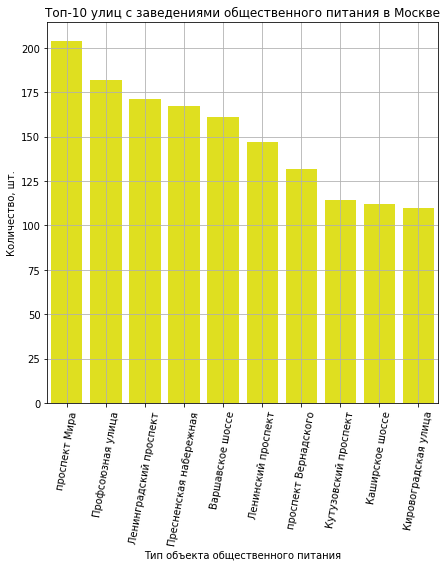

In [29]:
plt.figure(figsize=(7, 7))

sns.barplot(data=data_streets, x='street', y='id', color='yellow', saturation=0.75)

plt.title('Топ-10 улиц с заведениями общественного питания в Москве')
plt.xlabel('Тип объекта общественного питания')
plt.ylabel('Количество, шт.')
plt.xticks(rotation=80) 
plt.grid()

plt.savefig('6.png')
plt.show()

На графике представлены Топ-10 улиц Москвы с самым большим количеством заведений общественного питания.   
Лидеры:
- проспект Мира (8,9 км);   
- Профсоюзная улица (9,3 км);   
- Ленинградский проспект (5,6 км).

In [30]:
spreadsheet_id = '1CPDYDGjKCb6jGoQt9KR5WOvTspK-dHS3NUrVeqsyqJs'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_areas = pd.read_csv(BytesIO(r.content))
data_areas

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [31]:
areas_top_10 = data_streets.merge(data_areas, left_on='street', right_on='streetname')
areas_top_10

,street,id,streetname,areaid,okrug,area
0,проспект Мира,204,проспект Мира,70,СВАО,Алексеевский район
1,проспект Мира,204,проспект Мира,86,СВАО,Ярославский Район
2,проспект Мира,204,проспект Мира,78,СВАО,Район Марьина роща
3,проспект Мира,204,проспект Мира,79,СВАО,Останкинский район
4,проспект Мира,204,проспект Мира,81,СВАО,Район Ростокино
5,проспект Мира,204,проспект Мира,82,СВАО,Район Свиблово
6,проспект Мира,204,проспект Мира,16,ЦАО,Мещанский район
7,Профсоюзная улица,182,Профсоюзная улица,123,ЮЗАО,Академический район
8,Профсоюзная улица,182,Профсоюзная улица,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,Профсоюзная улица,134,ЮЗАО,Район Ясенево


In [32]:
print("Улицы с самым большим количеством заведений общественного питания располагаются в районах:", areas_top_10['area'].unique())

Улицы с самым большим количеством заведений общественного питания располагаются в районах: ['Алексеевский район' 'Ярославский Район' 'Район Марьина роща'
 'Останкинский район' 'Район Ростокино' 'Район Свиблово' 'Мещанский район'
 'Академический район' 'Район Черемушки' 'Район Ясенево' 'Район Коньково'
 'Обручевский район' 'Район Теплый Стан' 'Район Аэропорт' 'Район Беговой'
 'Хорошевский район' 'Район Сокол' 'Пресненский район'
 'Район Чертаново Центральное' 'Район Чертаново Северное'
 'Район Чертаново Южное' 'Донской район' 'Район Нагатино-Садовники'
 'Нагорный район' 'Район Северное Бутово' 'Район Южное Бутово'
 'Район Проспект Вернадского' 'Район Тропарево-Никулино'
 'Район Гагаринский' 'Ломоносовский район' 'Район Якиманка'
 'Район Раменки' 'Район Дорогомилово' 'Район Фили-Давыдково'
 'Район Москворечье-Сабурово' 'Район Орехово-Борисово Южное'
 'Район Орехово-Борисово Северное']


In [43]:
areas_top_10.groupby('streetname', as_index=False).agg({'okrug': set, 'area': set})

,streetname,okrug,area
0,Варшавское шоссе,"{ЮЗАО, ЮАО}","{Район Чертаново Северное, Район Чертаново Цен..."
1,Каширское шоссе,{ЮАО},"{Район Москворечье-Сабурово, Район Орехово-Бор..."
2,Кировоградская улица,{ЮАО},"{Район Чертаново Северное, Район Чертаново Цен..."
3,Кутузовский проспект,{ЗАО},"{Район Дорогомилово, Район Фили-Давыдково}"
4,Ленинградский проспект,{САО},"{Район Беговой, Район Аэропорт, Район Сокол, Х..."
5,Ленинский проспект,"{ЦАО, ЮЗАО, ЮАО, ЗАО}","{Район Гагаринский, Район Теплый Стан, Ломонос..."
6,Пресненская набережная,{ЦАО},{Пресненский район}
7,Профсоюзная улица,{ЮЗАО},"{Район Ясенево, Обручевский район, Академическ..."
8,проспект Вернадского,"{ЮЗАО, ЗАО}","{Район Тропарево-Никулино, Район Гагаринский, ..."
9,проспект Мира,"{ЦАО, СВАО}","{Мещанский район, Район Марьина роща, Район Ро..."


In [33]:
areas_top_10.groupby('streetname').count()[['area']]

,area
streetname,
Варшавское шоссе,8
Каширское шоссе,4
Кировоградская улица,3
Кутузовский проспект,2
Ленинградский проспект,4
Ленинский проспект,8
Пресненская набережная,1
Профсоюзная улица,6
проспект Вернадского,5


Районов слишком много и распределение равномерно и без перевесов, поэтому сузим аналитику до округов.

In [34]:
data_areas_top_10 = areas_top_10.groupby('okrug', as_index=False)['id'].count().sort_values(by='id', ascending=False)
data_areas_top_10

,okrug,id
4,ЮАО,14
5,ЮЗАО,14
0,ЗАО,7
2,СВАО,6
1,САО,4
3,ЦАО,3


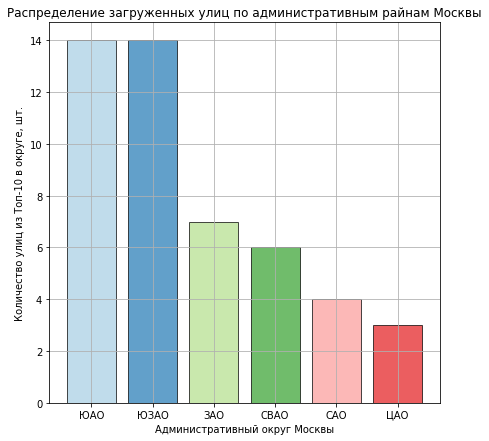

In [35]:
plt.figure(figsize=(7, 7))
col_map = plt.get_cmap('Paired')

plt.bar(
    x='okrug', 
    height='id',
    data= data_areas_top_10,
    alpha=0.7,
    color=col_map.colors, 
    edgecolor='k'
)

plt.title('Распределение загруженных улиц по административным райнам Москвы')
plt.xlabel('Административный округ Москвы')
plt.ylabel('Количество улиц из Топ-10 в округе, шт.')
plt.grid()

plt.savefig('7.png')
plt.show()

In [36]:
street_only_one = data.groupby('street', as_index=False)['id'].count().query('id == 1')
street_only_one

,street,id
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1
...,...,...
1873,улица Шеногина,1
1876,улица Шумилова,1
1877,улица Шумкина,1
1881,улица Щорса,1


В нашей базе 571 улица с одним заведением общественного питания.

In [37]:
areas_only_one = street_only_one.merge(data_areas, left_on='street', right_on='streetname')
areas_only_one

,street,id,streetname,areaid,okrug,area
0,1-й Балтийский переулок,1,1-й Балтийский переулок,54,САО,Район Аэропорт
1,1-й Басманный переулок,1,1-й Басманный переулок,13,ЦАО,Басманный район
2,1-й Басманный переулок,1,1-й Басманный переулок,15,ЦАО,Красносельский район
3,1-й Ботанический проезд,1,1-й Ботанический проезд,82,СВАО,Район Свиблово
4,1-й Вешняковский проезд,1,1-й Вешняковский проезд,120,ЮВАО,Рязанский район
...,...,...,...,...,...,...
555,улица Шеногина,1,улица Шеногина,92,СЗАО,Район Хорошево-Мневники
556,улица Шумилова,1,улица Шумилова,113,ЮВАО,Район Кузьминки
557,улица Шумкина,1,улица Шумкина,26,ВАО,Район Сокольники
558,улица Щорса,1,улица Щорса,46,ЗАО,Район Солнцево


In [38]:
print("Улицы с одним заведением общественного питания располагаются в районах:", areas_only_one['area'].unique())

Улицы с одним заведением общественного питания располагаются в районах: ['Район Аэропорт' 'Басманный район' 'Красносельский район'
 'Район Свиблово' 'Рязанский район' 'Район Якиманка' 'Район Хамовники'
 'Район Соколиная Гора' 'Даниловский район' 'Мещанский район'
 'Таганский район' 'Район Лефортово' 'Район Печатники' 'Район Сокольники'
 'Район Замоскворечье' 'Хорошевский район' 'Район Арбат'
 'Алексеевский район' 'Район Текстильщики' 'Район Ростокино'
 'Район Раменки' 'Район Хорошево-Мневники' 'Район Покровское-Стрешнево'
 'Район Марьина роща' 'Район Богородское' 'Нижегородский район'
 'Тверской район' 'Лосиноостровский район' 'Район Преображенское'
 'Район Ново-Переделкино' 'Район Измайлово' 'Район Северное Измайлово'
 'Район Восточное Измайлово' 'Район Беговой' 'Донской район'
 'Район Гольяново' 'Войковский Район' 'Савеловский район'
 'Район Филевский Парк' 'Район Перово' 'Район Чертаново Южное'
 'Южнопортовый Район' 'Головинский район' 'Район Южное Бутово'
 'Останкинский район' 'Рай

In [39]:
areas_only_one.groupby('area', as_index=False)['id'].count().sort_values(by='id', ascending=False)

,area,id
93,Таганский район,27
79,Район Хамовники,26
3,Басманный район,25
94,Тверской район,20
20,Пресненский район,19
...,...,...
50,Район Марьино,1
51,Район Матушкино-Савелки,1
52,Район Метрогородок,1
54,Район Москворечье-Сабурово,1


Лидируют Таганский район, район Хамовники и Басманный район.   
Рассмотрим также аналитику по административным округам.

In [40]:
data_areas_only_one = areas_only_one.groupby('okrug', as_index=False)['id'].count().sort_values(by='id', ascending=False)
data_areas_only_one

,okrug,id
6,ЦАО,185
0,ВАО,72
4,СВАО,67
3,САО,55
8,ЮВАО,55
1,ЗАО,41
7,ЮАО,30
5,СЗАО,27
9,ЮЗАО,27
2,Зеленоград,1


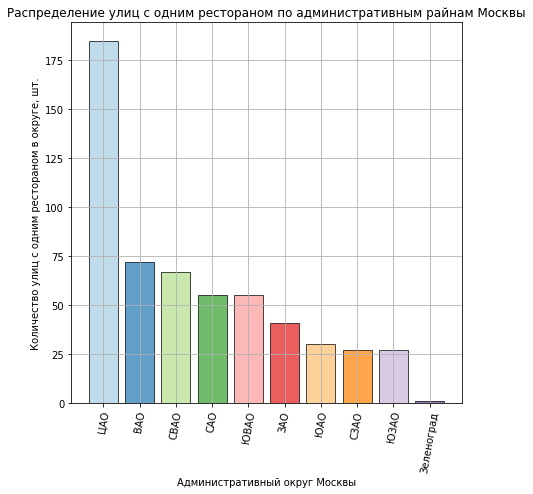

In [41]:
plt.figure(figsize=(7, 7))
col_map = plt.get_cmap('Paired')

plt.bar(
    x='okrug', 
    height='id',
    data=data_areas_only_one,
    alpha=0.7,
    color=col_map.colors, 
    edgecolor='k'
)

plt.title('Распределение улиц с одним рестораном по административным райнам Москвы')
plt.xlabel('Административный округ Москвы')
plt.ylabel('Количество улиц с одним рестораном в округе, шт.')
plt.xticks(rotation=80)
plt.grid()

plt.savefig('8.png')
plt.show()

ЦАО - однозначный лидер по количеству улиц с 1 заведением общественного питания.

In [42]:
print(areas_top_10['area'].isin(areas_only_one['area']).mean())

0.7291666666666666


Районы с улицами, насыщенными заведениями общественного питания, и районы с улицами, на которых находится всего один объект общественного питания, пересекаются на 73 %.

 ##  **Выводы**
<a id='section_10'></a>

В течение работы мы: 

1. Исследовали соотношения разных типов заведений Москвы по нескольким признакам:   
   - В Москве на момент исследования бОльшая часть заведений относится к типу "кафе" - 39.7 % от всех заведений;
   - 19 % ресторанов Москвы на момент сбора информации сетевые;   
   - Самая большая доля сетевых заведений среди предприятий быстрого обслуживания(34%) и магазинов(отделов кулинарий)(29%);
2. Изучили среднее количество посадочных мест в разных типах заведений Москвы   
Из графика можно сделать вывод, что для сетевых ресторанов характерно небольшое количество заведений (меньше 10), а вот больше 45 посадочных или меньше - уже на усмотрение руководителей. 
3. Провели анализ места расположения:   
   - Улицы, на которых больше всего заведений общественного питания - проспект Мира и Профсоюзная улица;
   - Административные округа Москвы, в которых расплагаются самые загруженные улицы - ЮАО и ЮЗАО.

Заведение общественного питания, которое планируется открыть:   

- Тип - кафе - как и 40% всех заведений Москвы;   
- Несетевое как и 81 % заведений Москвы;   
- Количество посадочных мест - 40, как и в среднем в кафе в Москве;   
- По расположению – нам важна высокая проходимость на улице, поэтому можно выбрать улицы из Топ-10 в ЮАО или ЮЗАО.